*Name*:Jeswanth S

Register Number:212221230042

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
single_image= X_train[0]

In [9]:
single_image.shape

(28, 28)

Jeswanth 21001768


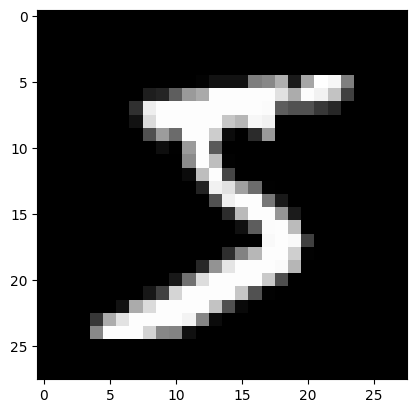

In [10]:
plt.imshow(single_image,cmap='gray')
print("Jeswanth 212221230042")

In [11]:
y_train.shape

(60000,)

In [12]:
X_train.min()

0

In [13]:
X_train.max()

255

In [14]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [15]:
X_train_scaled.min()

0.0

In [16]:
X_train_scaled.max()

1.0

In [17]:
y_train[0]

5

In [18]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [19]:
type(y_train_onehot)

numpy.ndarray

In [20]:
y_train_onehot.shape

(60000, 10)

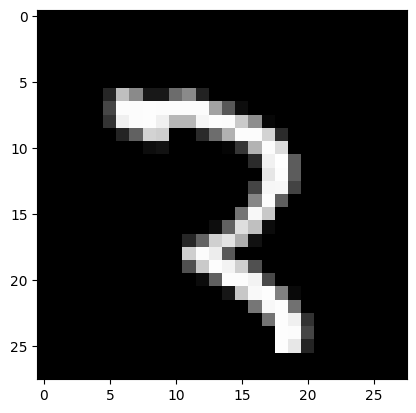

In [21]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [22]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:Jeswanth S

Register Number:212221230042

In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [26]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [27]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2013 - accuracy: 0.9393 - val_loss: 0.0738 - val_accuracy: 0.9767
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0614 - accuracy: 0.9811 - val_loss: 0.0481 - val_accuracy: 0.9839
Epoch 3/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0465 - val_accuracy: 0.9845
Epoch 4/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0348 - val_accuracy: 0.9884
Epoch 5/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.0327 - val_accuracy: 0.9896


In [28]:
metrics = pd.DataFrame(model.history.history)

In [29]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.201306,0.939267,0.073823,0.9767
1,0.061423,0.981150,0.048110,0.9839
2,0.042896,0.986933,0.046533,0.9845
3,0.034102,0.989417,0.034815,0.9884
4,0.027106,0.991267,0.032719,0.9896


Jeswanth 212221230042


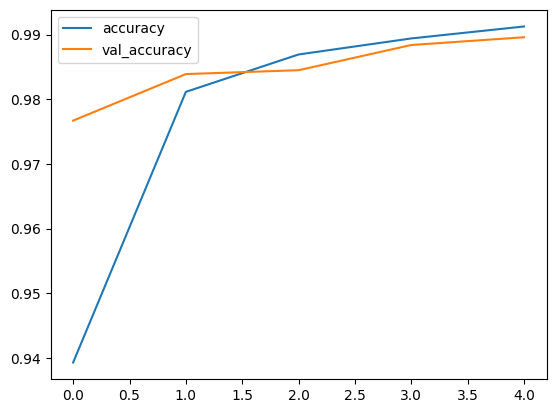

In [30]:
metrics[['accuracy','val_accuracy']].plot()
print("Jeswanth 212221230042")

<Axes: >

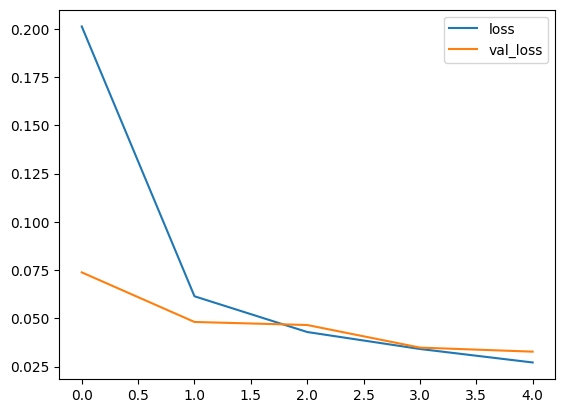

In [31]:
metrics[['loss','val_loss']].plot()

In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [33]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    1    0    0    0    1    1    0    1]
 [   2 1124    3    0    1    0    3    0    2    0]
 [   0    0 1024    3    1    0    0    4    0    0]
 [   0    0    4 1001    0    3    0    0    1    1]
 [   0    0    0    0  969    0    1    0    2   10]
 [   1    0    0    5    0  882    1    1    1    1]
 [   6    1    1    0    2    5  941    0    2    0]
 [   0    2    5    0    0    0    0 1012    1    8]
 [   4    0    3    2    0    1    0    0  961    3]
 [   1    0    0    0    1    1    0    0    0 1006]]


In [34]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [35]:
img = image.load_img('number 6.jpg')

In [36]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [37]:
img = image.load_img('number 6.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [38]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 13ms/step


In [39]:
print(x_single_prediction)

[1]


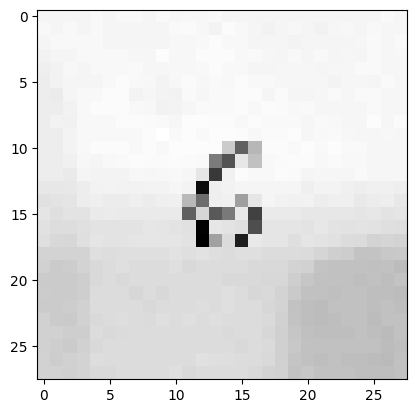

In [40]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [41]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 13ms/step


In [43]:
print(x_single_prediction)

[1]
